In [1505]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling as ppr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# Estimators
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Classification model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Classification metrics import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Cross Validation
from sklearn.model_selection import cross_val_score

#Model Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

#helpers
%matplotlib inline

### Importing clean data

In [1506]:
# Import Clean data
rawData = pd.read_csv('credit-data-clean.csv')
rawData.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,...,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


### Drop duplicates and null check

In [1507]:
#Drop duplicates
rawData = rawData.drop_duplicates()

#Check if null values are present
print(rawData.isnull().sum())

LIMIT_BAL         0
GENDER            0
EDUCATION         0
MARITAL_STATUS    0
AGE               0
REPAY_SEP05       0
REPAY_AUG05       0
REPAY_JUL05       0
REPAY_JUN05       0
REPAY_MAY05       0
REPAY_APR05       0
BILL_AMT_SEP05    0
BILL_AMT_AUG05    0
BILL_AMT_JUL05    0
BILL_AMT_JUN05    0
BILL_AMT_MAY05    0
BILL_AMT_APR05    0
PAY_AMT_SEP05     0
PAY_AMT_AUG05     0
PAY_AMT_JUL05     0
PAY_AMT_JUN05     0
PAY_AMT_MAY05     0
PAY_AMT_APR05     0
DEFAULT           0
dtype: int64


In [1508]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       29965 non-null  int64 
 1   GENDER          29965 non-null  object
 2   EDUCATION       29965 non-null  object
 3   MARITAL_STATUS  29965 non-null  int64 
 4   AGE             29965 non-null  int64 
 5   REPAY_SEP05     29965 non-null  int64 
 6   REPAY_AUG05     29965 non-null  int64 
 7   REPAY_JUL05     29965 non-null  int64 
 8   REPAY_JUN05     29965 non-null  int64 
 9   REPAY_MAY05     29965 non-null  int64 
 10  REPAY_APR05     29965 non-null  int64 
 11  BILL_AMT_SEP05  29965 non-null  int64 
 12  BILL_AMT_AUG05  29965 non-null  int64 
 13  BILL_AMT_JUL05  29965 non-null  int64 
 14  BILL_AMT_JUN05  29965 non-null  int64 
 15  BILL_AMT_MAY05  29965 non-null  int64 
 16  BILL_AMT_APR05  29965 non-null  int64 
 17  PAY_AMT_SEP05   29965 non-null  int64 
 18  PAY_AM

In [1509]:
rawData['GENDER'].describe()

count      29965
unique         2
top       female
freq       18091
Name: GENDER, dtype: object

In [1510]:
rawData['DEFAULT'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: DEFAULT, dtype: object

### Label encode columns with 2 or less categorical values

In [1511]:
# Label encode 
le = LabelEncoder()
rawData['GENDER'] = le.fit_transform(rawData['GENDER'])

In [1512]:
# Label encode 
le = LabelEncoder()
rawData['DEFAULT'] = le.fit_transform(rawData['DEFAULT'])

In [1513]:
rawData.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,...,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT
0,20000,0,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,0,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,0,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,0,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [1514]:
# Checking label->data mapping info : Filtering data later for modeling

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'default': 0, 'not default': 1}


In [1515]:
rawData['EDUCATION'].describe()

count          29965
unique             4
top       university
freq           14019
Name: EDUCATION, dtype: object

#### Hot-Encode 'Education'

In [1516]:
rawData = pd.get_dummies(rawData)

In [1517]:
rawData.head()

,LIMIT_BAL,GENDER,MARITAL_STATUS,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,...,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,0,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1


In [1518]:
rawData.dtypes

LIMIT_BAL                    int64
GENDER                       int64
MARITAL_STATUS               int64
AGE                          int64
REPAY_SEP05                  int64
REPAY_AUG05                  int64
REPAY_JUL05                  int64
REPAY_JUN05                  int64
REPAY_MAY05                  int64
REPAY_APR05                  int64
BILL_AMT_SEP05               int64
BILL_AMT_AUG05               int64
BILL_AMT_JUL05               int64
BILL_AMT_JUN05               int64
BILL_AMT_MAY05               int64
BILL_AMT_APR05               int64
PAY_AMT_SEP05                int64
PAY_AMT_AUG05                int64
PAY_AMT_JUL05                int64
PAY_AMT_JUN05                int64
PAY_AMT_MAY05                int64
PAY_AMT_APR05                int64
DEFAULT                      int64
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [1519]:
creditdata = rawData.copy()
print(creditdata.isnull().sum())
creditdata.describe()

LIMIT_BAL                    0
GENDER                       0
MARITAL_STATUS               0
AGE                          0
REPAY_SEP05                  0
REPAY_AUG05                  0
REPAY_JUL05                  0
REPAY_JUN05                  0
REPAY_MAY05                  0
REPAY_APR05                  0
BILL_AMT_SEP05               0
BILL_AMT_AUG05               0
BILL_AMT_JUL05               0
BILL_AMT_JUN05               0
BILL_AMT_MAY05               0
BILL_AMT_APR05               0
PAY_AMT_SEP05                0
PAY_AMT_AUG05                0
PAY_AMT_JUL05                0
PAY_AMT_JUN05                0
PAY_AMT_MAY05                0
PAY_AMT_APR05                0
DEFAULT                      0
EDUCATION_graduate school    0
EDUCATION_high school        0
EDUCATION_other              0
EDUCATION_university         0
dtype: int64


,LIMIT_BAL,GENDER,MARITAL_STATUS,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,...,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1520]:
creditdata.head(10)

,LIMIT_BAL,GENDER,MARITAL_STATUS,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,...,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,0,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1
5,50000,1,2,37,0,0,0,0,0,0,...,1815,657,1000,1000,800,1,1,0,0,0
6,500000,1,2,29,0,0,0,0,0,0,...,40000,38000,20239,13750,13770,1,1,0,0,0
7,100000,0,2,23,0,-1,-1,0,0,-1,...,601,0,581,1687,1542,1,0,0,0,1
8,140000,0,1,28,0,0,2,0,0,0,...,0,432,1000,1000,1000,1,0,1,0,0
9,20000,1,2,35,-2,-2,-2,-2,-1,-1,...,0,0,13007,1122,0,1,0,1,0,0


In [1521]:
# Redundent values replaced. Yielded better acc score for classification
# Replace values -2 to 0
creditdata['REPAY_SEP05'] = creditdata['REPAY_SEP05'].replace(-2,0)
creditdata['REPAY_AUG05'] = creditdata['REPAY_AUG05'].replace(-2,0)
creditdata['REPAY_JUL05'] = creditdata['REPAY_JUL05'].replace(-2,0)
creditdata['REPAY_JUN05'] = creditdata['REPAY_JUN05'].replace(-2,0)
creditdata['REPAY_MAY05'] = creditdata['REPAY_MAY05'].replace(-2,0)
creditdata['REPAY_APR05'] = creditdata['REPAY_APR05'].replace(-2,0)

# #Replace -1 to 0
creditdata['REPAY_SEP05'] = creditdata['REPAY_SEP05'].replace(-1,0)
creditdata['REPAY_AUG05'] = creditdata['REPAY_AUG05'].replace(-1,0)
creditdata['REPAY_JUL05'] = creditdata['REPAY_JUL05'].replace(-1,0)
creditdata['REPAY_JUN05'] = creditdata['REPAY_JUN05'].replace(-1,0)
creditdata['REPAY_MAY05'] = creditdata['REPAY_MAY05'].replace(-1,0)
creditdata['REPAY_APR05'] = creditdata['REPAY_APR05'].replace(-1,0)

### EDA - Pandas Profiling

In [1522]:
profile = creditdata.profile_report(title='Pandas Profiling Report')
profile.to_file("report/CreditOnedataprofiling.html")

### Correlation Heatmap

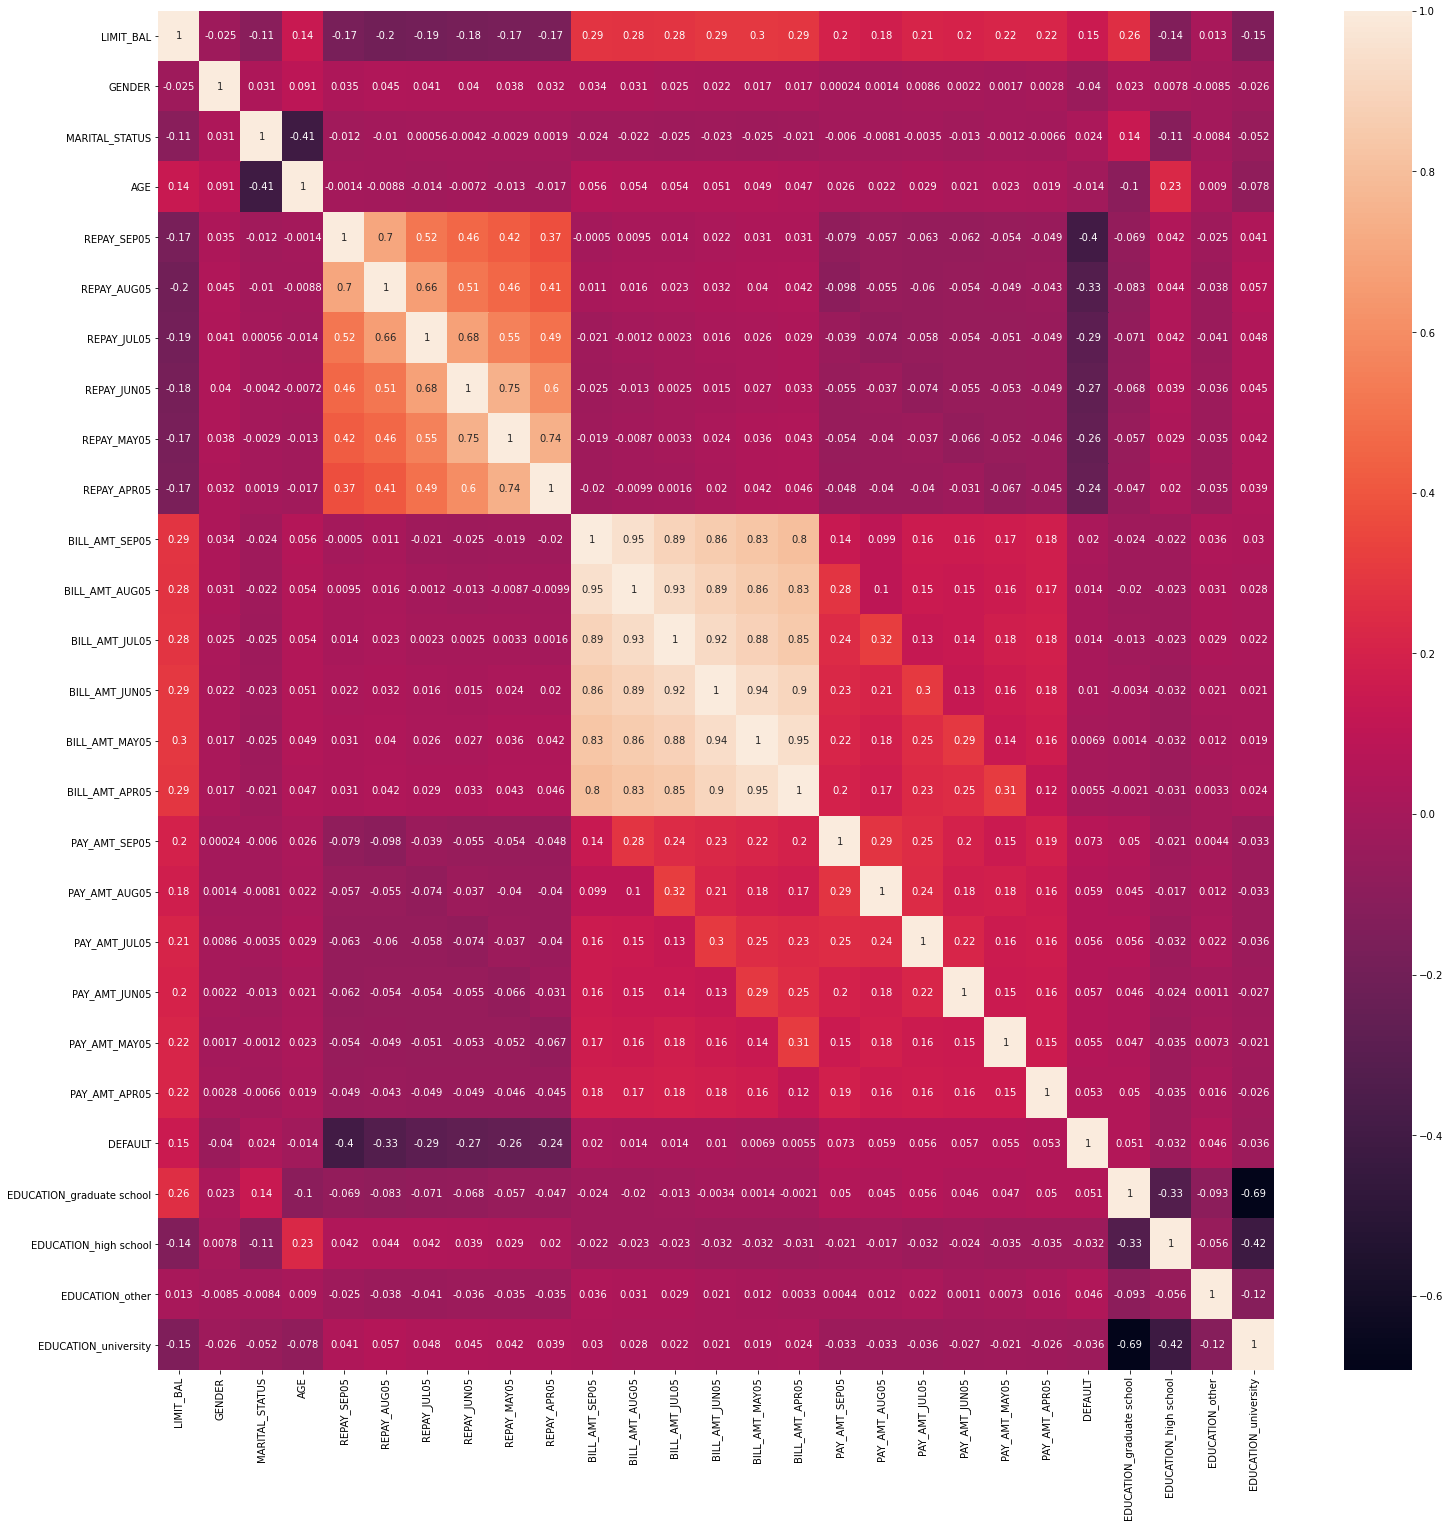

In [1523]:
Var_Corr = creditdata.corr()
plt.figure(figsize=(25,25))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, annot=True)
plt.show()

### Modeling
#### Dicretize Limit-bal to categorical

In [1524]:
# 4 BINS for more even data split, $ yielded better accuracy score compared to higher bins.

# balance_category = ['1','2','3','4']
creditdata['LIMIT_BAL_CAT'] = pd.qcut(creditdata['LIMIT_BAL'],q=4, labels=False) 
print(creditdata['LIMIT_BAL_CAT'].unique())
print(creditdata['LIMIT_BAL_CAT'].value_counts())

[0 1 3 2]
0    7673
2    7627
1    7607
3    7058
Name: LIMIT_BAL_CAT, dtype: int64


In [1525]:
# DROP FEATURES HERE
drop_columns = ["GENDER","MARITAL_STATUS","EDUCATION_other","EDUCATION_graduate school","EDUCATION_high school","EDUCATION_university"]
creditdata.drop(labels=drop_columns, axis=1, inplace=True)

In [1526]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       29965 non-null  int64
 1   AGE             29965 non-null  int64
 2   REPAY_SEP05     29965 non-null  int64
 3   REPAY_AUG05     29965 non-null  int64
 4   REPAY_JUL05     29965 non-null  int64
 5   REPAY_JUN05     29965 non-null  int64
 6   REPAY_MAY05     29965 non-null  int64
 7   REPAY_APR05     29965 non-null  int64
 8   BILL_AMT_SEP05  29965 non-null  int64
 9   BILL_AMT_AUG05  29965 non-null  int64
 10  BILL_AMT_JUL05  29965 non-null  int64
 11  BILL_AMT_JUN05  29965 non-null  int64
 12  BILL_AMT_MAY05  29965 non-null  int64
 13  BILL_AMT_APR05  29965 non-null  int64
 14  PAY_AMT_SEP05   29965 non-null  int64
 15  PAY_AMT_AUG05   29965 non-null  int64
 16  PAY_AMT_JUL05   29965 non-null  int64
 17  PAY_AMT_JUN05   29965 non-null  int64
 18  PAY_AMT_MAY05   29965 non-

In [1527]:
# Dataframe with only DEFAULT data

defaultdataframe = creditdata[creditdata['DEFAULT'] == 0]
defaultdataframe.head(10)

,LIMIT_BAL,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,...,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,LIMIT_BAL_CAT
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,689,0,0,0,0,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,3455,3261,0,1000,1000,1000,0,2000,0,1
13,70000,30,1,2,2,0,0,2,65802,67369,...,36137,36894,3200,0,3000,3000,1500,0,0,1
16,20000,24,0,0,2,2,2,2,15376,18010,...,17905,19104,3200,0,1500,0,1650,0,0,0
21,120000,39,0,0,0,0,0,0,316,316,...,632,316,316,316,0,632,316,0,0,1
22,70000,26,2,0,0,2,2,2,41087,42445,...,46905,46012,2007,3582,0,3601,0,1820,0,1
23,450000,40,0,0,0,0,0,0,5512,19420,...,0,0,19428,1473,560,0,0,1128,0,3
26,60000,27,1,0,0,0,0,0,-109,-425,...,127,-189,0,1000,0,500,0,1000,0,1
31,50000,33,2,0,0,0,0,0,30518,29618,...,23217,23680,1718,1500,1000,1000,1000,716,0,0
38,50000,25,1,0,0,0,0,0,0,780,...,0,0,780,0,0,0,0,0,0,0


### Modeling with raw data (Only for customers = DEFAULT)  - no dicretization

In [1528]:
# X Variables
X = defaultdataframe.iloc[:,1:-2]
X.head()

,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,BILL_AMT_JUL05,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05
0,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
13,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0
16,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0
21,39,0,0,0,0,0,0,316,316,316,0,632,316,316,316,0,632,316,0


In [1529]:
# Y Variable
y = defaultdataframe['LIMIT_BAL']
y.head()

0      20000
1     120000
13     70000
16     20000
21    120000
Name: LIMIT_BAL, dtype: int64

In [1530]:
# Train test split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .25, random_state = 123)

[0.2207192  0.23820543 0.24571696]
Training RMSE  99216.48042393953
                       Coeff
AGE              1599.893340
REPAY_SEP05     -5266.494143
REPAY_AUG05    -10937.699874
REPAY_JUL05     -3364.851495
REPAY_JUN05     -2893.006997
REPAY_MAY05     -1423.063232
REPAY_APR05     -6298.254174
BILL_AMT_SEP05      0.342518
BILL_AMT_AUG05     -0.063106
BILL_AMT_JUL05     -0.097304
BILL_AMT_JUN05     -0.105362
BILL_AMT_MAY05      0.407230
BILL_AMT_APR05      0.070305
PAY_AMT_SEP05       0.268920
PAY_AMT_AUG05       0.798664
PAY_AMT_JUL05       0.414960
PAY_AMT_JUN05       0.314517
PAY_AMT_MAY05       0.608592
PAY_AMT_APR05       0.838939
R Squared: 0.210
Pred RMSE: 102155.326
Training RMSE  99216.48042393953


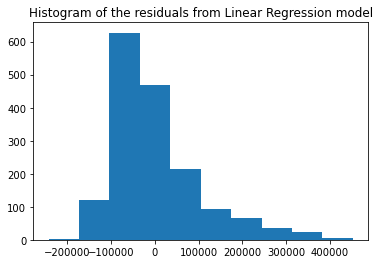

In [1531]:
#Modeling (Linear Regression)
# Training RMSE close to TEST RMSE

algo = LinearRegression()
model = algo.fit(X_train,y_train)
print(cross_val_score(model, X,y, cv=3, scoring='r2'))

#RMSE for train set
train_predict = model.predict(X_train)
rmsetrain = sqrt(mean_squared_error(y_train, train_predict))
print('Training RMSE ', rmsetrain )

print(pd.DataFrame(model.coef_, X.columns, columns = ['Coeff']))

#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('Pred RMSE: %.3f' % rmse)
print('Training RMSE ', rmsetrain )

# Plot a histogram of the residuals from our machine learning model.
plt.hist(y_test-predictions)
plt.title("Histogram of the residuals from Linear Regression model");

<AxesSubplot:xlabel='LIMIT_BAL'>

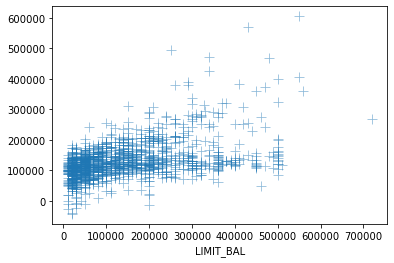

In [1532]:
# Plotting Preds 

sns.scatterplot(x=y_test,y=predictions,marker="+", s=100,alpha=0.5) 

## R2 score better than other regression models

[0.50511205 0.51884371 0.49923218]
R Squared: 0.512
Pred RMSE: 80232.861
Training RMSE  34754.655882214094


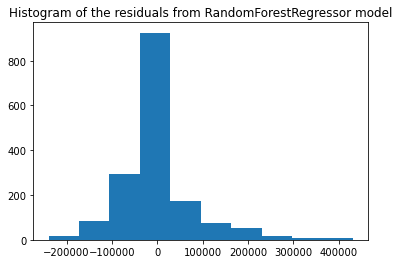

In [1533]:
#Modeling (RandomForestRegressor)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)
print(cross_val_score(model, X,y, cv=3, scoring='r2'))

#RMSE for train set
train_predict = model.predict(X_train)
rmsetrain = sqrt(mean_squared_error(y_train, train_predict))

#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('Pred RMSE: %.3f' % rmse)
print('Training RMSE ', rmsetrain )

#This is a histogram of the residuals from our machine learning model.
plt.hist(y_test-predictions)
plt.title("Histogram of the residuals from RandomForestRegressor model");

<AxesSubplot:xlabel='LIMIT_BAL'>

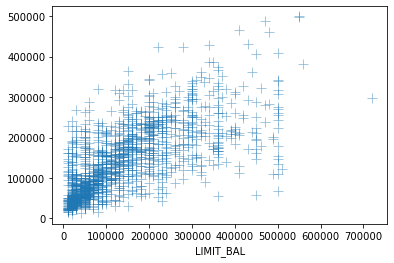

In [1534]:
# Plotting Preds for sample of data

sns.scatterplot(x=y_test,y=predictions,marker="+",s=100,alpha=0.5) 

[-0.1509556  -0.03592203 -0.14121431]
R Squared: -0.116
RMSE: 121368.998
Training RMSE  122037.24633484766


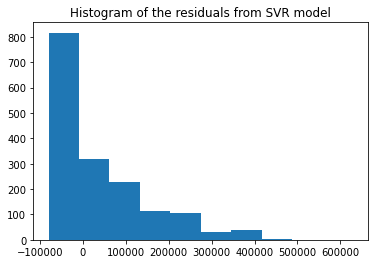

In [1535]:
#Modeling (SVR)
algo = SVR()
model = algo.fit(X_train,y_train)

print(cross_val_score(model, X,y, cv=3, scoring='r2'))

#RMSE for train set
train_predict = model.predict(X_train)
rmsetrain = sqrt(mean_squared_error(y_train, train_predict))

#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Training RMSE ', rmsetrain )

#This is a histogram of the residuals from our machine learning model.
plt.hist(y_test-predictions)
plt.title("Histogram of the residuals from SVR model");


<AxesSubplot:xlabel='LIMIT_BAL'>

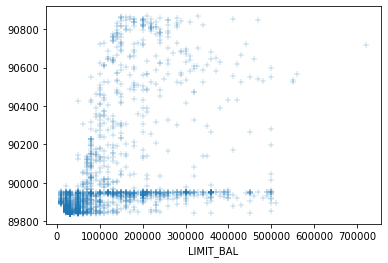

In [1536]:
# Plotting Preds 

sns.scatterplot(x=y_test,y=predictions,marker="+", alpha=0.5) 

In [1537]:
predictions

array([89883.91556754, 89939.25916777, 90532.56537258, ...,
       89937.18173848, 89947.0687938 , 89887.53870355])

### CrossValScore comparison for various algorithms

In [1538]:
algosClass = []

In [1539]:
# Randon Forest Regressor
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [1540]:
# LinearRegression
algosClass.append(('Linear Regression',LinearRegression()))

In [1541]:
# SVR Support Vector Regression
algosClass.append(('Support Vector Regression',SVR()))

In [1542]:
# REGRESSION Crossvalscore

results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [1543]:
for i in range(len(names)):
    print(names[i],results[i].mean())


Random Forest Regressor 0.5077975863588448
Linear Regression 0.23488052831230774
Support Vector Regression -0.10936398214035219


# Classification Modelling

## Classification model #1 
DV - LIMIT_BAL
     
     1. Discretized LIMIT_BAL
     2. LIMIT_BAL as category
     3. Default has both default and non-default customers


In [1544]:
creditdata.head()

,LIMIT_BAL,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,...,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,LIMIT_BAL_CAT
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,689,0,0,0,0,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14948,15549,1518,1500,1000,1000,1000,5000,1,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,19146,19131,2000,36681,10000,9000,689,679,1,0


In [1545]:
# X Variables
X = creditdata.iloc[:,1:-1]
X.head()

,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,BILL_AMT_JUL05,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT
0,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [1546]:
# Y Variable
y = creditdata['LIMIT_BAL_CAT']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: LIMIT_BAL_CAT, dtype: int64

In [1547]:
# Train test split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .25, random_state = 123)


#### Modeling (Classification)


In [1548]:
#DecisionTreeClassifier

algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.48384943940202885
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1915
           1       0.46      0.46      0.46      1935
           2       0.39      0.40      0.39      1884
           3       0.45      0.45      0.45      1758

    accuracy                           0.48      7492
   macro avg       0.48      0.48      0.48      7492
weighted avg       0.49      0.48      0.48      7492



In [1549]:
#Modeling (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model.fit(X_train,y_train)

#Predicting test set result
y_pred=model.predict(X_test)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1915
           1       0.46      0.46      0.46      1935
           2       0.39      0.40      0.39      1884
           3       0.45      0.45      0.45      1758

    accuracy                           0.48      7492
   macro avg       0.48      0.48      0.48      7492
weighted avg       0.49      0.48      0.48      7492

0.5836892685531233


In [1550]:
# CrossValScore comparison for Decision tree and RandomForest for discretised data
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [1551]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5745369666344633
Decision Tree Classifier 0.47522125158659706


## Classification model #2
DV - LIMIT_BAL

     1. LIMIT_BAL Discretized as categorical variable
     2. Filtered Data to ONLY have Default customers


In [1552]:
# X Variables
X = defaultdataframe.iloc[:,1:-2]
X.head()

,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,BILL_AMT_JUL05,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05
0,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
13,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0
16,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0
21,39,0,0,0,0,0,0,316,316,316,0,632,316,316,316,0,632,316,0


In [1553]:
# Y Variable
y = defaultdataframe['LIMIT_BAL_CAT']
y.head()

0     0
1     1
13    1
16    0
21    1
Name: LIMIT_BAL_CAT, dtype: int64

In [1554]:
# Train test split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .25, random_state = 123)


#### Modeling (Classification)


In [1555]:

#DecisionTreeClassifier

algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.5542822677925211
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       608
           1       0.51      0.55      0.53       472
           2       0.37      0.40      0.39       333
           3       0.45      0.42      0.43       245

    accuracy                           0.55      1658
   macro avg       0.52      0.52      0.52      1658
weighted avg       0.56      0.55      0.56      1658



In [1556]:
#Modeling (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model.fit(X_train,y_train)

#Predicting test set result
y_pred=model.predict(X_test)

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.75      0.70      0.72       608
           1       0.51      0.55      0.53       472
           2       0.37      0.40      0.39       333
           3       0.45      0.42      0.43       245

    accuracy                           0.55      1658
   macro avg       0.52      0.52      0.52      1658
weighted avg       0.56      0.55      0.56      1658



In [1557]:
accuracy_score(y_test, y_pred)

0.6278648974668275

In [1558]:
# CrossValScore comparison for Decision tree and RandomForest
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [1559]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6413273001508296
Decision Tree Classifier 0.543288084464555


## Classification model #3
DV - DEFAULT

In [1560]:
creditdata.head()

,LIMIT_BAL,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,...,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05,DEFAULT,LIMIT_BAL_CAT
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,689,0,0,0,0,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14948,15549,1518,1500,1000,1000,1000,5000,1,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,19146,19131,2000,36681,10000,9000,689,679,1,0


In [1561]:
# X Variables
X = creditdata.iloc[:,:-2]
X.head()

,LIMIT_BAL,AGE,REPAY_SEP05,REPAY_AUG05,REPAY_JUL05,REPAY_JUN05,REPAY_MAY05,REPAY_APR05,BILL_AMT_SEP05,BILL_AMT_AUG05,BILL_AMT_JUL05,BILL_AMT_JUN05,BILL_AMT_MAY05,BILL_AMT_APR05,PAY_AMT_SEP05,PAY_AMT_AUG05,PAY_AMT_JUL05,PAY_AMT_JUN05,PAY_AMT_MAY05,PAY_AMT_APR05
0,20000,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [1562]:
# Y Variable
y = creditdata['DEFAULT']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: DEFAULT, dtype: int64

#### Modeling (Classification)


In [1563]:
# Train test split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .25, random_state = 123)


In [1564]:
#DecisionTreeClassifier

algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.7303790710090764
              precision    recall  f1-score   support

           0       0.40      0.39      0.40      1688
           1       0.82      0.83      0.83      5804

    accuracy                           0.73      7492
   macro avg       0.61      0.61      0.61      7492
weighted avg       0.73      0.73      0.73      7492



In [1565]:
#Modeling (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model.fit(X_train,y_train)

#Predicting test set result
y_pred=model.predict(X_test)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.39      0.40      1688
           1       0.82      0.83      0.83      5804

    accuracy                           0.73      7492
   macro avg       0.61      0.61      0.61      7492
weighted avg       0.73      0.73      0.73      7492

0.8154030966364122


In [1566]:
# CrossValScore comparison for Decision tree and RandomForest
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [1567]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8145172578636393
Decision Tree Classifier 0.7247792856483342
